In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

In [3]:
data = pd.read_csv('mpd.csv')
bac_mbp = data.loc[data['market'] =='bac'].copy()

bac_mbp['maturity_target'].fillna(3, inplace=True)
bac_mbp.isna().sum()

market             0
idt                0
maturity_target    0
mu                 0
sd                 0
skew               0
kurt               0
p10                0
p50                0
p90                0
lg_change_decr     0
prDec              0
lg_change_incr     0
prInc              0
dtype: int64

In [4]:
bac_mbp.head()
bac_mbp['Date'] = pd.to_datetime(bac_mbp['idt'], format='%m/%d/%y')
bac_mbp = bac_mbp.set_index('Date')
bac_mbp.drop('idt',axis= 1, inplace=True)
bac_mbp['Inc_Dec'] = bac_mbp['prInc'] - bac_mbp['prDec']

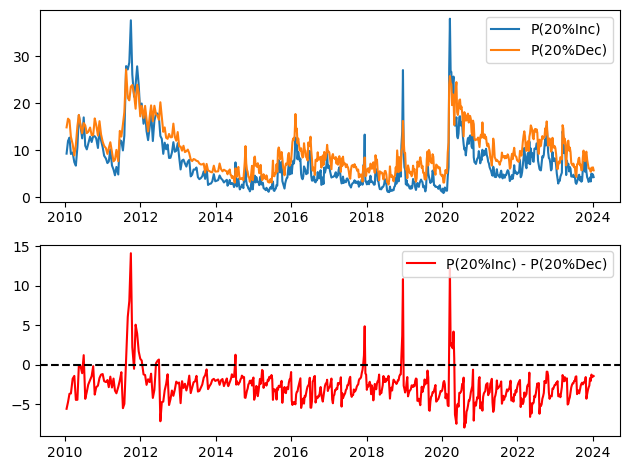

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(bac_mbp.index, bac_mbp['prInc']*100, label = 'P(20%Inc)')
ax1.plot(bac_mbp.index, bac_mbp['prDec']*100, label = 'P(20%Dec)')
ax1.legend(loc='upper right')

ax2.plot(bac_mbp.index, bac_mbp['Inc_Dec']*100, label = 'P(20%Inc) - P(20%Dec)', color = 'red')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

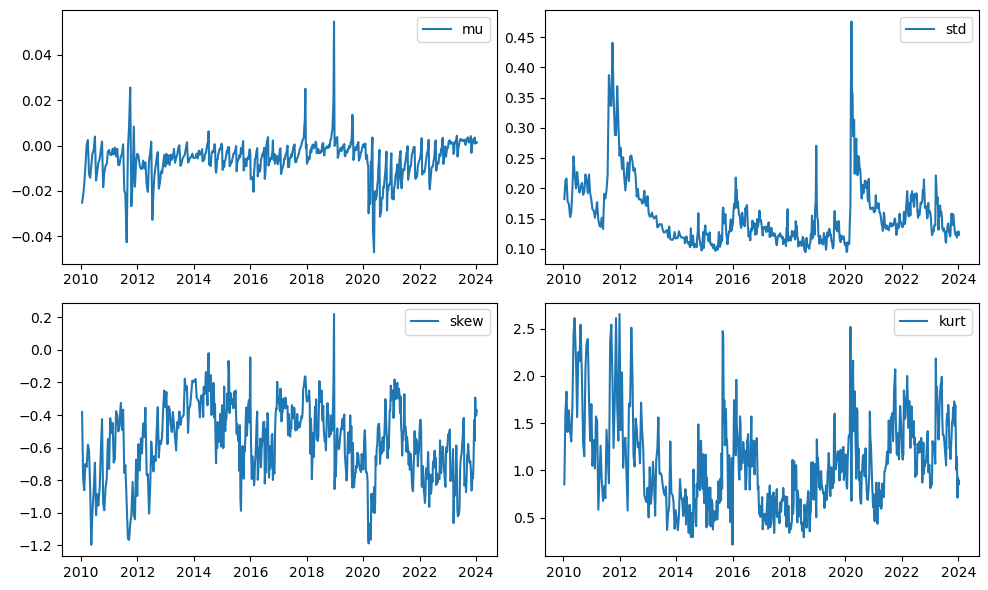

In [6]:
fig, axes = plt.subplots(2,2,figsize=(10, 6))

axes[0,0].plot(bac_mbp.index, bac_mbp['mu'], label = 'mu')
axes[0,1].plot(bac_mbp.index, bac_mbp['sd'], label = 'std')
axes[1,0].plot(bac_mbp.index, bac_mbp['skew'], label = 'skew')
axes[1,1].plot(bac_mbp.index, bac_mbp['kurt'], label = 'kurt')

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
plt.tight_layout()
plt.show()

In [7]:
bac = yf.download('BAC', start = '2010-01-05', end = '2024-01-22', progress=False)
bac.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-05,15.740000,16.209999,15.700000,16.200001,13.182898,209521300
2010-01-06,16.209999,16.540001,16.030001,16.389999,13.337511,205257900
2010-01-07,16.680000,17.190001,16.510000,16.930000,13.776943,320868400
2010-01-08,16.980000,17.100000,16.629999,16.780001,13.654881,220104700
2010-01-11,16.990000,17.139999,16.719999,16.930000,13.776943,168991600


In [25]:
future_returns = pd.DataFrame()
for day in range(1,100,10):
    future_returns[f'{day}day_return'] =  (bac['Close'].shift(-day) - bac['Close'])/bac['Close']

df = pd.DataFrame(index =  bac_mbp.index)
df['Inc_Dec'] = bac_mbp['Inc_Dec']

new_df = df.merge(future_returns, left_index=True,right_index=True)

In [37]:
corr_df = pd.DataFrame()
for fname in new_df.columns:
    if fname not in ['1day_return', '11day_return', '21day_return', '31day_return', '41day_return','51day_return','61day_return','71day_return','81day_return','91day_return']:
        s = pd.Series(dtype=float)
        s['c_1'] = round(new_df[fname].corr(new_df["1day_return"]),3)
        s['c_11'] = round(new_df[fname].corr(new_df["11day_return"]),3)
        s['c_21'] = round(new_df[fname].corr(new_df["21day_return"]),3)
        s['c_31'] = round(new_df[fname].corr(new_df["31day_return"]),3)
        s['c_41'] = round(new_df[fname].corr(new_df["41day_return"]),3)
        s['c_51'] = round(new_df[fname].corr(new_df["51day_return"]),3)
        s['c_61'] = round(new_df[fname].corr(new_df["61day_return"]),3)
        s['c_71'] = round(new_df[fname].corr(new_df["71day_return"]),3)
        s['c_81'] = round(new_df[fname].corr(new_df["81day_return"]),3)
        s['c_91'] = round(new_df[fname].corr(new_df["91day_return"]),3)
        corr_df[fname] = s

corr_df

,Inc_Dec
c_1,-0.083
c_11,0.036
c_21,0.089
c_31,0.063
c_41,0.021
c_51,0.028
c_61,0.027
c_71,0.037
c_81,0.064
c_91,0.070


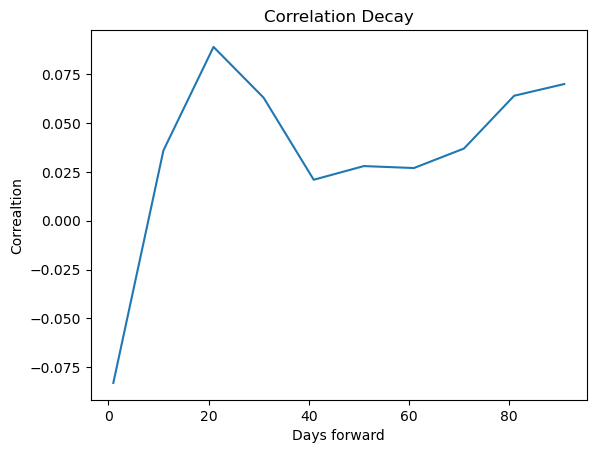

In [38]:
plt.plot(range(1,100,10), corr_df.values)
plt.title('Correlation Decay')
plt.ylabel('Correaltion')
plt.xlabel('Days forward')
plt.show()

In [39]:
new_df.corr(method='spearman')

,Inc_Dec,1day_return,11day_return,21day_return,31day_return,41day_return,51day_return,61day_return,71day_return,81day_return,91day_return
Inc_Dec,1.000000,-0.031214,0.080155,0.081576,0.022055,-0.023735,-0.017005,-0.013072,0.015696,0.015082,0.001427
1day_return,-0.031214,1.000000,0.292880,0.273411,0.249870,0.242028,0.254701,0.207236,0.194437,0.178240,0.145114
11day_return,0.080155,0.292880,1.000000,0.725077,0.591412,0.505559,0.451051,0.408963,0.403267,0.388989,0.338166
21day_return,0.081576,0.273411,0.725077,1.000000,0.817058,0.694778,0.615848,0.548162,0.515817,0.509215,0.473170
31day_return,0.022055,0.249870,0.591412,0.817058,1.000000,0.864618,0.772018,0.680718,0.630475,0.605401,0.584209
41day_return,-0.023735,0.242028,0.505559,0.694778,0.864618,1.000000,0.889365,0.786477,0.717505,0.678078,0.641168
51day_return,-0.017005,0.254701,0.451051,0.615848,0.772018,0.889365,1.000000,0.892919,0.809994,0.766171,0.717811
61day_return,-0.013072,0.207236,0.408963,0.548162,0.680718,0.786477,0.892919,1.000000,0.910248,0.845962,0.792529
71day_return,0.015696,0.194437,0.403267,0.515817,0.630475,0.717505,0.809994,0.910248,1.000000,0.929139,0.868585
81day_return,0.015082,0.178240,0.388989,0.509215,0.605401,0.678078,0.766171,0.845962,0.929139,1.000000,0.937547
